<a href="https://colab.research.google.com/github/Afitr06/kecerdasan/blob/main/pert2lthn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import queue
import matplotlib.pyplot as plt

In [21]:
# Astar Algorithm 
def Astar(startNode, heuristics, graph, goalNode="Bucharest"): 
    priorityQueue = queue.PriorityQueue() 
    distance = 0 
    path = []
    
    priorityQueue.put((heuristics[startNode] + distance, [startNode, 0]))

    while priorityQueue.empty() == False: 
        current = priorityQueue.get()[1] 
        path.append(current[0]) 
        distance += int(current[1])

        if current[0] == goalNode: 
            break
        
        priorityQueue = queue.PriorityQueue()
        
        for i in graph[current[0]]: 
            if i[0] not in path: 
                priorityQueue.put((heuristics[i[0]] + int(i[1]) + distance, i))

    return path

In [22]:
# drawing map of answer
def drawMap(city, gbfs, astar, graph): 
    for i, j in city.items(): 
        plt.plot(j[0], j[1], "ro") 
        plt.annotate(i, (j[0] + 5, j[1]))

        for k in graph[i]:
            n = city[k[0]] 
            plt.plot([j[0], n[0]], [j[1], n[1]], "gray")

    for i in range(len(gbfs)):
        try:
            first = city[gbfs[i]]  
            secend = city[gbfs[i + 1]] 
            
            plt.plot([first[0], secend[0]], [first[1], secend[1]], "green")
        except:
            continue
            
    for i in range(len(astar)):
        try:
            first = city[astar[i]] 
            secend = city[astar[i + 1]]

            plt.plot([first[0], secend[0]], [first[1], secend[1]], "blue")
        except:
            continue

    plt.errorbar(1, 1, label="GBFS", color="green") 
    plt.errorbar(1, 1, label="ASTAR", color="blue") 
    plt.legend(loc="lower left")

    plt.show()

1 Arad
2 Bucharest
3 Craiova
4 Dobreta
5 Eforie
6 Fagaras
7 Giurgiu
8 Hirsova
9 Iasi
10 Lugoj
11 Mehadia
12 Neamt
13 Oradea
14 Pitesti
15 Rimnicu_Vilcea
16 Sibiu
17 Timisoara
18 Urziceni
19 Vaslui
20 Zerind
Masukan nomor KOTA ASAL (0 untuk keluar): 1
GBFS =>  ['Arad', 'Sibiu', 'Fagaras', 'Bucharest', 'Giurgiu']
ASTAR =>  ['Arad', 'Sibiu', 'Rimnicu_Vilcea', 'Pitesti', 'Bucharest']


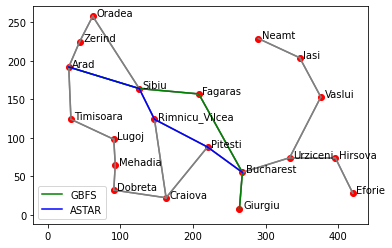

Masukan nomor KOTA ASAL (0 untuk keluar): 0


In [23]:
# running the program 
def main(): 
    heuristic = getHeuristics() 
    graph = createGraph() 
    city, citiesCode = getCity()

    for i, j in citiesCode.items(): 
        print(i, j)

    while True:
        inputCode = int(input("Masukan nomor KOTA ASAL (0 untuk keluar): "))
            
        if inputCode == 0: 
            break

        cityName = citiesCode[inputCode]

        gbfs = GBFS(cityName, heuristic, graph) 
        astar = Astar(cityName, heuristic, graph)  
        print("GBFS => ", gbfs) 
        print("ASTAR => ", astar)
            
        drawMap(city, gbfs, astar, graph)

main()